60201359 이주영 5주차 보너스 과제

In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv("data/weather.csv")

print(df.shape)
df.head()

(366, 20)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes


C:\Users\jylpi\AppData\Local\Temp\ipykernel_4152\3265302810.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


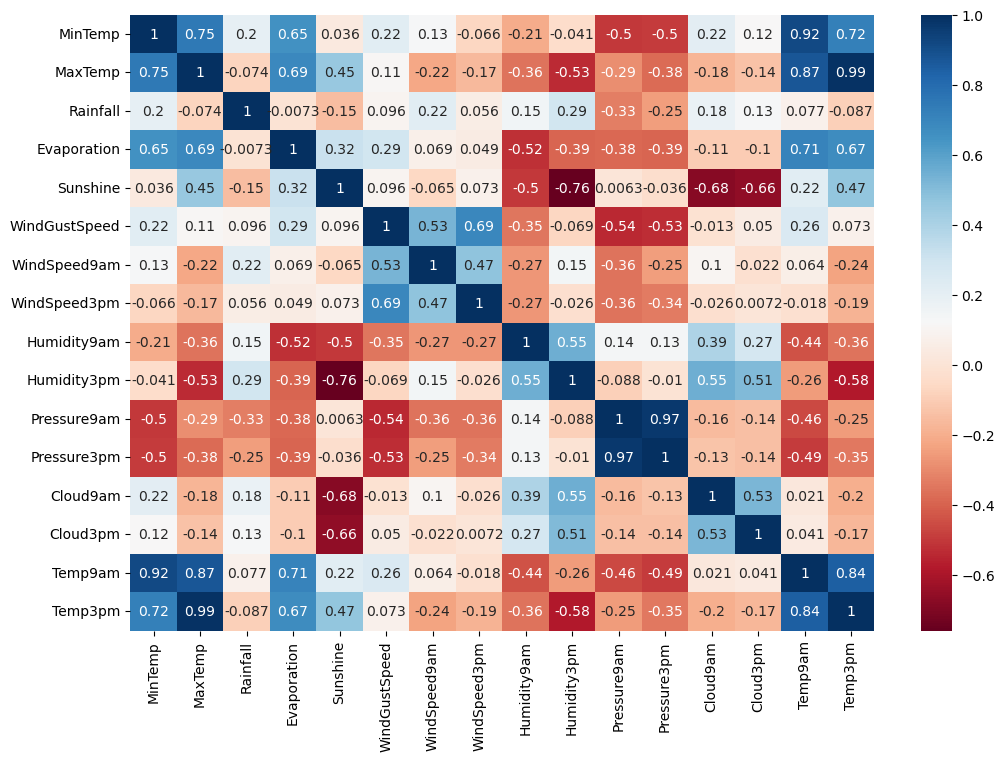

In [4]:
#상관관계 분석
import seaborn as sns

plt.figure(figsize=(12,8))
corr=df.corr()
sns.heatmap(corr, annot=True, cmap="RdBu")
plt.show()

In [5]:
#결측치 확인
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
dtype: int64

min / max temp, temp9am, evaporation은 높은 양의 상관관계를 보였고, humidity9am / 3pm, pressure9am / 3pm은 높은 음의 상관관계를 보였다.

결측값이 많았던 WinDir9am/3pm과 낮은 상관관계를 보이는 WindGustSpeed/9am/3pm을 삭제한다.
RainToday를 yes 1, no 0으로 바꾼다.

In [6]:
df = df.drop(['WindDir9am','WindDir3pm','WindGustSpeed','WindSpeed9am','WindSpeed3pm'], axis=1)
df["RainToday"]=df.RainToday.map({"No":0, "Yes":1})
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8.0,24.3,0.0,3.4,6.3,NW,68,29,1019.7,1015.0,7,7,14.4,23.6,0
1,14.0,26.9,3.6,4.4,9.7,ENE,80,36,1012.4,1008.4,5,3,17.5,25.7,1
2,13.7,23.4,3.6,5.8,3.3,NW,82,69,1009.5,1007.2,8,7,15.4,20.2,1
3,13.3,15.5,39.8,7.2,9.1,NW,62,56,1005.5,1007.0,2,7,13.5,14.1,1
4,7.6,16.1,2.8,5.6,10.6,SSE,68,49,1018.3,1018.5,7,7,11.1,15.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,38,15,1016.1,1010.8,1,3,20.4,30.0,0
362,7.1,28.4,0.0,11.6,12.7,N,45,22,1020.0,1016.9,0,1,17.2,28.2,0
363,12.5,19.9,0.0,8.4,5.3,ESE,63,47,1024.0,1022.8,3,2,14.5,18.3,0
364,12.5,26.9,0.0,5.0,7.1,NW,69,39,1021.0,1016.2,6,7,15.8,25.9,0


In [7]:
#Sunshine결측치는 중간값으로, WindGustDir 결측치는 삭제함
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)
df.dropna(subset=['WindGustDir'], inplace=True)

#결측치 확인
df.isnull().sum()

MinTemp        0
MaxTemp        0
Rainfall       0
Evaporation    0
Sunshine       0
WindGustDir    0
Humidity9am    0
Humidity3pm    0
Pressure9am    0
Pressure3pm    0
Cloud9am       0
Cloud3pm       0
Temp9am        0
Temp3pm        0
RainToday      0
dtype: int64

In [8]:
#강수량이 0초과 1이하 인데 강수여부 No인 데이터가 있어 찾아보니 본 데이터는 강수량이 1.0 이상이어야 yes로 처리한 것을 확인했다. 비가 조금이라도 오면 yes로 처리하기로 결정했고, 강수여부를 바꾸었다.
df.loc[df["Rainfall"] > 0, "RainToday"] = 1

In [9]:
#날짜별로 강수여부가 있으니 이전 행의 정보로 RainYesterday를 만든다.

# RainYesterday 열 생성
df['RainYesterday'] = df['RainToday'].shift(1)
df['RainYesterday'].fillna(0, inplace=True)  # 첫 번째 행의 경우 강수여부가 없으므로 0으로 채움
df['RainYesterday'] = df['RainYesterday'].astype(int)  # 이진수 형태로 변환
df


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainYesterday
0,8.0,24.3,0.0,3.4,6.3,NW,68,29,1019.7,1015.0,7,7,14.4,23.6,0,0
1,14.0,26.9,3.6,4.4,9.7,ENE,80,36,1012.4,1008.4,5,3,17.5,25.7,1,0
2,13.7,23.4,3.6,5.8,3.3,NW,82,69,1009.5,1007.2,8,7,15.4,20.2,1,1
3,13.3,15.5,39.8,7.2,9.1,NW,62,56,1005.5,1007.0,2,7,13.5,14.1,1,1
4,7.6,16.1,2.8,5.6,10.6,SSE,68,49,1018.3,1018.5,7,7,11.1,15.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,38,15,1016.1,1010.8,1,3,20.4,30.0,0,0
362,7.1,28.4,0.0,11.6,12.7,N,45,22,1020.0,1016.9,0,1,17.2,28.2,0,0
363,12.5,19.9,0.0,8.4,5.3,ESE,63,47,1024.0,1022.8,3,2,14.5,18.3,0,0
364,12.5,26.9,0.0,5.0,7.1,NW,69,39,1021.0,1016.2,6,7,15.8,25.9,0,0


In [10]:
#내일 강수 예측을 위한 RainTomorrow를 만든다
df["RainTomorrow"] = df["Rainfall"].shift(-1).apply(lambda x: 1 if x > 0 else 0)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainYesterday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,68,29,1019.7,1015.0,7,7,14.4,23.6,0,0,1
1,14.0,26.9,3.6,4.4,9.7,ENE,80,36,1012.4,1008.4,5,3,17.5,25.7,1,0,1
2,13.7,23.4,3.6,5.8,3.3,NW,82,69,1009.5,1007.2,8,7,15.4,20.2,1,1,1
3,13.3,15.5,39.8,7.2,9.1,NW,62,56,1005.5,1007.0,2,7,13.5,14.1,1,1,1
4,7.6,16.1,2.8,5.6,10.6,SSE,68,49,1018.3,1018.5,7,7,11.1,15.4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,38,15,1016.1,1010.8,1,3,20.4,30.0,0,0,0
362,7.1,28.4,0.0,11.6,12.7,N,45,22,1020.0,1016.9,0,1,17.2,28.2,0,0,0
363,12.5,19.9,0.0,8.4,5.3,ESE,63,47,1024.0,1022.8,3,2,14.5,18.3,0,0,0
364,12.5,26.9,0.0,5.0,7.1,NW,69,39,1021.0,1016.2,6,7,15.8,25.9,0,0,0


In [11]:
#원핫인코딩
df= pd.get_dummies(df)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,8.0,24.3,0.0,3.4,6.3,68,29,1019.7,1015.0,7,...,0,1,0,0,0,0,0,0,0,0
1,14.0,26.9,3.6,4.4,9.7,80,36,1012.4,1008.4,5,...,0,0,0,0,0,0,0,0,0,0
2,13.7,23.4,3.6,5.8,3.3,82,69,1009.5,1007.2,8,...,0,1,0,0,0,0,0,0,0,0
3,13.3,15.5,39.8,7.2,9.1,62,56,1005.5,1007.0,2,...,0,1,0,0,0,0,0,0,0,0
4,7.6,16.1,2.8,5.6,10.6,68,49,1018.3,1018.5,7,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,38,15,1016.1,1010.8,1,...,1,0,0,0,0,0,0,0,0,0
362,7.1,28.4,0.0,11.6,12.7,45,22,1020.0,1016.9,0,...,0,0,0,0,0,0,0,0,0,0
363,12.5,19.9,0.0,8.4,5.3,63,47,1024.0,1022.8,3,...,0,0,0,0,0,0,0,0,0,0
364,12.5,26.9,0.0,5.0,7.1,69,39,1021.0,1016.2,6,...,0,1,0,0,0,0,0,0,0,0


In [12]:
#특성과 타깃 분리
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,8.0,24.3,0.0,3.4,6.3,68,29,1019.7,1015.0,7,...,0,1,0,0,0,0,0,0,0,0
1,14.0,26.9,3.6,4.4,9.7,80,36,1012.4,1008.4,5,...,0,0,0,0,0,0,0,0,0,0
2,13.7,23.4,3.6,5.8,3.3,82,69,1009.5,1007.2,8,...,0,1,0,0,0,0,0,0,0,0
3,13.3,15.5,39.8,7.2,9.1,62,56,1005.5,1007.0,2,...,0,1,0,0,0,0,0,0,0,0
4,7.6,16.1,2.8,5.6,10.6,68,49,1018.3,1018.5,7,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,38,15,1016.1,1010.8,1,...,1,0,0,0,0,0,0,0,0,0
362,7.1,28.4,0.0,11.6,12.7,45,22,1020.0,1016.9,0,...,0,0,0,0,0,0,0,0,0,0
363,12.5,19.9,0.0,8.4,5.3,63,47,1024.0,1022.8,3,...,0,0,0,0,0,0,0,0,0,0
364,12.5,26.9,0.0,5.0,7.1,69,39,1021.0,1016.2,6,...,0,1,0,0,0,0,0,0,0,0


In [13]:
y

0      1
1      1
2      1
3      1
4      0
      ..
361    0
362    0
363    0
364    0
365    0
Name: RainTomorrow, Length: 363, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (254, 31)
y_train 크기: (254,)
X_test 크기: (109, 31)
y_test 크기: (109,)


In [16]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=0) #max미지정
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
#모델성능평가
temp_y_pred = tree.predict(X_test)
#training 값을 X_test에서 넣음
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

예측값
 [0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0
 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
실제값
 310    0
307    1
45     1
26     0
220    0
      ..
277    0
268    0
150    0
236    0
116    0
Name: RainTomorrow, Length: 109, dtype: int64


In [18]:
#정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc = accuracy_score(y_test, temp_y_pred)
#y_test와 temp_y_pred로 예측한 값을 적용하여 temp_acc를 추출함

print('정확도: ', format(temp_acc))

정확도:  0.7614678899082569


In [19]:
#과적합과 가지치기
train_scores, test_scores = list(), list()
#train_score와 test_score의 정확도 저장 장소
#train_score는 훈련데이터에 특화될수록 증가
#test_score는 테스트데이터에 일반화될수록 증가

In [20]:
#의사결정나무 모델의 깊이 조절(1~19)
for i in range(1,20):
    DT1=DecisionTreeClassifier(max_depth=i)
    #깊이를 증가시키면서 ~나무 모델 적합
    DT1.fit(X_train, y_train)
    
    #traing dataset 정확도 평가
    train_att= DT1.predict(X_train)
    train_acc= accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    #test dataset 정확도 평가
    test_att= DT1.predict(X_test)
    test_acc= accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    #train 정확도와 test 정확도를 depth개수에 따른 정확도 확인
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.791, test: 0.798
>2, train: 0.815, test: 0.752
>3, train: 0.862, test: 0.798
>4, train: 0.902, test: 0.817
>5, train: 0.906, test: 0.826
>6, train: 0.925, test: 0.807
>7, train: 0.961, test: 0.761
>8, train: 0.969, test: 0.752
>9, train: 0.988, test: 0.761
>10, train: 0.992, test: 0.743
>11, train: 0.996, test: 0.761
>12, train: 1.000, test: 0.761
>13, train: 1.000, test: 0.743
>14, train: 1.000, test: 0.743
>15, train: 1.000, test: 0.752
>16, train: 1.000, test: 0.752
>17, train: 1.000, test: 0.761
>18, train: 1.000, test: 0.752
>19, train: 1.000, test: 0.761


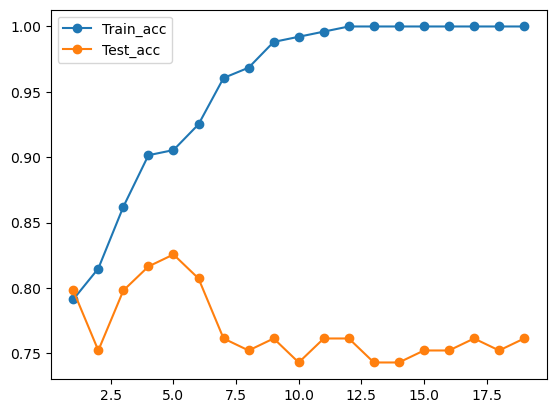

In [21]:
from matplotlib import pyplot

pyplot.plot(range(1,20), train_scores, '-o', label= 'Train_acc')
pyplot.plot(range(1,20), test_scores, '-o', label= 'Test_acc')
pyplot.legend()
pyplot.show()

#최적의 ~나무 깊이는 5 (적당하면서 주황색 제일 높은 지점)

In [22]:
tree = DecisionTreeClassifier(random_state=0, max_depth=5)
tree.fit(X_train, y_train)
#새로운 최적깊이 값(5) 부여

DecisionTreeClassifier(max_depth=5, random_state=0)

In [23]:
#트리시각화
import graphviz
from sklearn.tree import export_graphviz

In [24]:
#시각화를 위한 열 목록 출력
print(df.columns.tolist())

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainYesterday', 'RainTomorrow', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW']


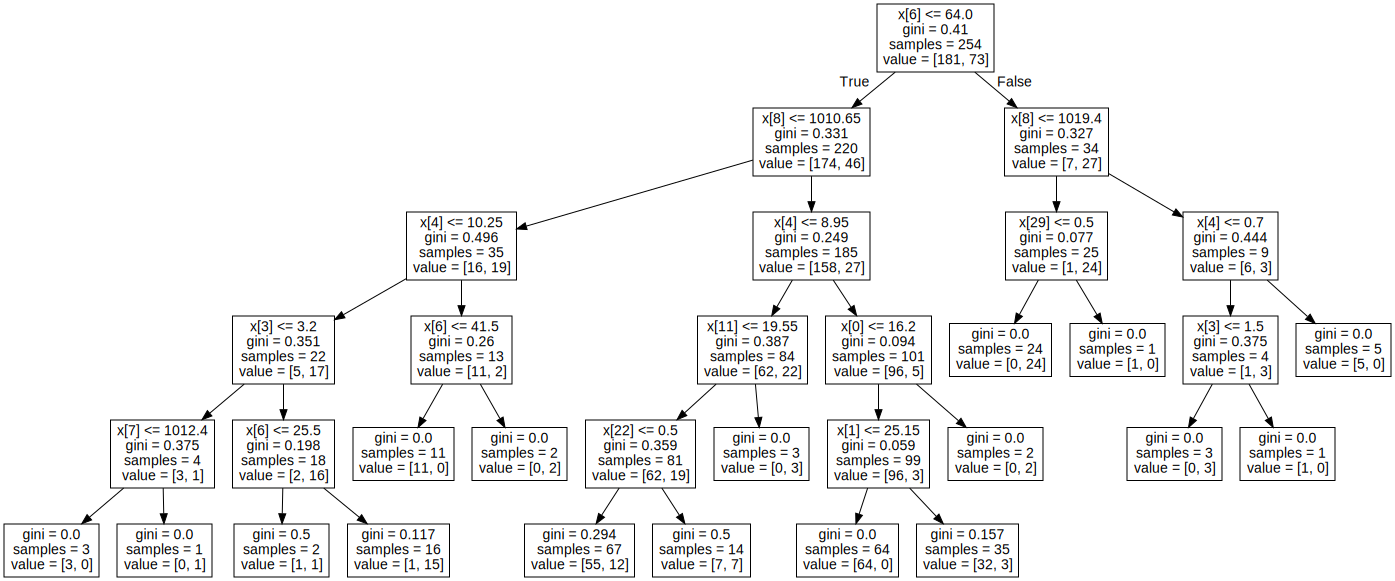

In [25]:
feature_name=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW']
tree_graph=export_graphviz(tree)
graphviz.Source(tree_graph)

In [27]:
dot=graphviz.Source(tree_graph)
dot.format = 'gif'
dot.render(filename='weather2_tree', directory="tree", cleanup=True)

'tree\\weather2_tree.gif'

In [28]:
tree.predict(X_test)
#ROC실습

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [29]:
#오차행렬(Confusion Matrix)
print(confusion_matrix(y_test, temp_y_pred))

[[64 15]
 [11 19]]


In [30]:
#모델 성능
print(classification_report(y_test,tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        79
           1       0.71      0.50      0.59        30

    accuracy                           0.81       109
   macro avg       0.77      0.71      0.73       109
weighted avg       0.80      0.81      0.80       109



In [31]:
#변수중요도
# 랜덤포레스트 분류기 모델 학습
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# 변수 중요도 출력
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                 importance
Humidity3pm        0.146457
Pressure3pm        0.102187
Sunshine           0.101399
Cloud3pm           0.072219
Pressure9am        0.068028
MinTemp            0.066098
Humidity9am        0.065149
Temp3pm            0.062621
Temp9am            0.059006
MaxTemp            0.054674
Evaporation        0.047992
Cloud9am           0.034658
Rainfall           0.028480
WindGustDir_NW     0.015160
RainToday          0.012643
RainYesterday      0.008673
WindGustDir_NNW    0.006872
WindGustDir_E      0.005979
WindGustDir_W      0.005660
WindGustDir_WNW    0.005187
WindGustDir_S      0.004782
WindGustDir_NNE    0.004743
WindGustDir_SSW    0.004466
WindGustDir_ESE    0.003930
WindGustDir_ENE    0.003428
WindGustDir_N      0.002723
WindGustDir_SE     0.002632
WindGustDir_SSE    0.002358
WindGustDir_NE     0.001664
WindGustDir_SW     0.000129
WindGustDir_WSW    0.000004


중요도가 높은 순서대로 나열되었으며, Humidity3pm,Pressure3pm,  Sunshin으로 5주차 과제랑 달리 보너스과제에선 2 3순위가 바뀌어 높게 나왔다.

In [32]:
tree.predict_proba(X_test)[:,1]
#0.5보다 크면 비 내림, 작으면 비 안 내림

array([0.17910448, 0.17910448, 1.        , 0.17910448, 0.        ,
       0.17910448, 1.        , 0.08571429, 0.        , 0.17910448,
       1.        , 0.5       , 0.        , 0.08571429, 0.        ,
       0.        , 0.08571429, 0.9375    , 0.        , 0.17910448,
       0.9375    , 0.17910448, 0.        , 0.        , 0.08571429,
       0.17910448, 0.17910448, 0.5       , 0.08571429, 0.17910448,
       0.        , 0.        , 0.08571429, 0.17910448, 0.17910448,
       0.17910448, 0.08571429, 0.        , 0.        , 0.17910448,
       0.17910448, 0.08571429, 0.17910448, 0.        , 0.9375    ,
       0.08571429, 1.        , 1.        , 0.5       , 1.        ,
       0.        , 0.        , 0.9375    , 0.        , 0.17910448,
       0.9375    , 0.        , 0.        , 0.        , 0.9375    ,
       0.        , 0.17910448, 0.        , 0.        , 0.        ,
       1.        , 0.5       , 0.17910448, 0.        , 0.5       ,
       0.17910448, 0.9375    , 1.        , 0.17910448, 0.17910

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

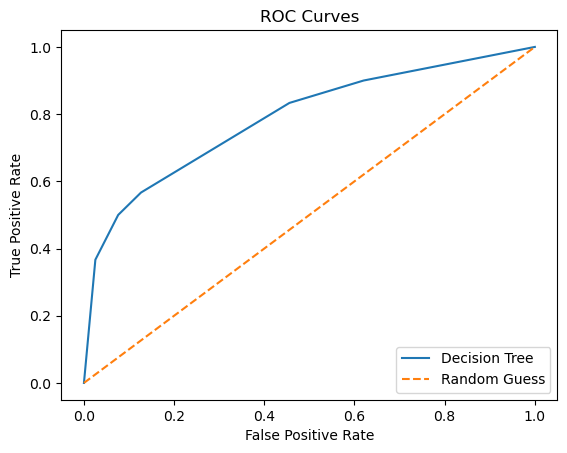

In [34]:
#ROC curve 그래프 그리기
plt.plot(fpr, tpr, '-', ms=2, label="Decision Tree")
plt.plot([0,1],[0,1],'--',label="Random Guess")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [35]:
#AUC 계산
from sklearn import metrics
roc_auc=metrics.auc(fpr,tpr)
print('Area Under Curve : %0.2f'% roc_auc)

Area Under Curve : 0.79


In [36]:
print('정확도: ', format(temp_acc))

정확도:  0.7614678899082569


후기

보너스 과제는 5주차 과제 복제본을 만들어 진행하였다. 데이터에 "yesterday" 열이 존재하지 않고, 각 행의 날짜가 연속되어 있으므로, 이전 행의 강수여부 정보를 활용하여 "RainYesterday" 열을 만든 것 말고는 똑같이 진행했는데 정확도가 72%->76%로 더 높아진 모델을 만들었다. 원인을 추측하고는 있지만 데이터 정확도는 여러가지 요인이 영향을 주어 앞으로도 고민해봐야겠다.